In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [69]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# [seeds](https://archive.ics.uci.edu/ml/datasets/seeds) Dataset: k-Means Clustering

In [22]:
cols = ['area', 'perimeter', 'compactness', 'length', 'width', 'asymmetry_coef', 'l_groove', 'type']
seeds = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt',
                    delim_whitespace=True, names=cols)
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coef,l_groove,type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [25]:
seeds.describe(include='all')

,area,perimeter,compactness,length,width,asymmetry_coef,l_groove,type
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [26]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            210 non-null    float64
 1   perimeter       210 non-null    float64
 2   compactness     210 non-null    float64
 3   length          210 non-null    float64
 4   width           210 non-null    float64
 5   asymmetry_coef  210 non-null    float64
 6   l_groove        210 non-null    float64
 7   type            210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


## Elbow Method: Measuring Inertia

In [31]:
seeds_ = seeds.copy()

In [32]:
seeds_.drop('type', axis=1, inplace=True)
seeds_ = seeds_.to_numpy()

In [34]:
seeds_.shape

(210, 7)

In [37]:
ks = range(1,12)
inertias = []

for k in ks:
    # Initiate KMeans with k clusters
    model1 = KMeans(k)
    # Fit to data
    model1.fit(seeds_)
    # Append inertia to list
    inertias.append(model1.inertia_)

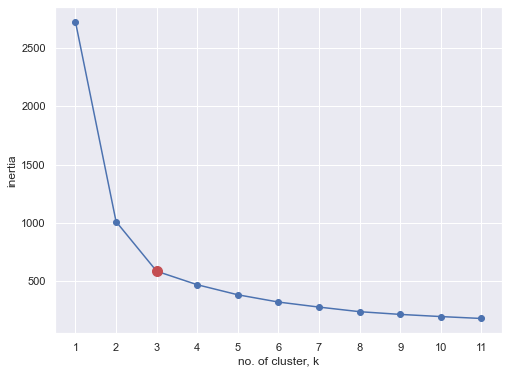

In [52]:
# Plot inertias vs ks
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(ks, inertias, '-o')
ax.plot(ks[2], inertias[2], 'ro', markersize=10)
ax.set_xlabel('no. of cluster, k')
ax.set_ylabel('inertia')
ax.set_xticks(ks)

plt.show()

## Compare using cross-tabulation

In [53]:
model1 = KMeans(3)

In [55]:
labels = model1.fit_predict(seeds_)

In [59]:
# Create dataframe with labels and varieties (grains) as columns
df = pd.DataFrame({'labels': labels,
                   'varieties': seeds.iloc[:, -1].map({1: 'Kama',
                                                       2: 'Rosa',
                                                       3: 'Canadian'})})

In [61]:
# Create crosstab
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,Canadian,Kama,Rosa
labels,,,
0,68,9,0
1,0,1,60
2,2,60,10


# [Fishcatch](http://jse.amstat.org/jse_data_archive.htm) Dataset

In [160]:
cols = ['obs', 'species', 'weight', 'length1', 'length2', 'length3', 'height%', 'width%', 'sex']
fish = pd.read_csv('http://jse.amstat.org/datasets/fishcatch.dat.txt',
                   delim_whitespace=True, names=cols)
fish.head()

,obs,species,weight,length1,length2,length3,height%,width%,sex
0,1,1,242.0,23.2,25.4,30.0,38.4,13.4,NaN
1,2,1,290.0,24.0,26.3,31.2,40.0,13.8,NaN
2,3,1,340.0,23.9,26.5,31.1,39.8,15.1,NaN
3,4,1,363.0,26.3,29.0,33.5,38.0,13.3,NaN
4,5,1,430.0,26.5,29.0,34.0,36.6,15.1,NaN


In [85]:
# To match it with DataCamp dataset
fish_ = fish.copy()
fish_.drop(columns=['obs', 'species', 'sex'], inplace=True)

In [86]:
fish_.drop(index=range(103,159), inplace=True)
fish_.drop(index=range(61, 72), inplace=True)
fish_.drop(index=range(35, 41), inplace=True)

In [88]:
fish_.reset_index(inplace=True)

In [91]:
fish_.drop('index', axis=1, inplace=True)

In [102]:
fish_.dropna(inplace=True)
fish_.head()

,weight,length1,length2,length3,height%,width%
0,242.0,23.2,25.4,30.0,38.4,13.4
1,290.0,24.0,26.3,31.2,40.0,13.8
2,340.0,23.9,26.5,31.1,39.8,15.1
3,363.0,26.3,29.0,33.5,38.0,13.3
4,430.0,26.5,29.0,34.0,36.6,15.1


In [103]:
fish_.describe(include='all')

,weight,length1,length2,length3,height%,width%
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,431.758824,27.338824,29.557647,33.120000,28.076471,12.865882
std,380.933962,11.289450,12.185045,13.197292,10.351543,2.117476
min,0.000000,9.300000,9.800000,10.800000,14.500000,8.700000
25%,120.000000,19.400000,21.000000,23.700000,16.900000,11.000000
50%,390.000000,28.400000,30.700000,35.000000,27.100000,13.700000
75%,650.000000,32.700000,36.000000,40.600000,39.200000,14.700000
max,1650.000000,59.000000,63.400000,68.000000,44.500000,16.100000


In [104]:
fish_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 85
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   weight   85 non-null     float64
 1   length1  85 non-null     float64
 2   length2  85 non-null     float64
 3   length3  85 non-null     float64
 4   height%  85 non-null     float64
 5   width%   85 non-null     float64
dtypes: float64(6)
memory usage: 4.6 KB


In [105]:
fish_.shape

(85, 6)

In [161]:
# Cluster labels
species = fish['species']
species.drop(index=range(103,159), inplace=True)
species.drop(index=range(61, 72), inplace=True)
species.drop(index=range(35, 41), inplace=True)
species.drop(index=[13], inplace=True)

In [162]:
species.reset_index(drop=True, inplace=True)

In [163]:
species = species.map({1: 'Bream',
                       3: 'Roach',
                       5: 'Smelt',
                       6: 'Pike'})

In [164]:
species

0     Bream
1     Bream
2     Bream
3     Bream
4     Bream
5     Bream
6     Bream
7     Bream
8     Bream
9     Bream
10    Bream
11    Bream
12    Bream
13    Bream
14    Bream
15    Bream
16    Bream
17    Bream
18    Bream
19    Bream
20    Bream
21    Bream
22    Bream
23    Bream
24    Bream
25    Bream
26    Bream
27    Bream
28    Bream
29    Bream
30    Bream
31    Bream
32    Bream
33    Bream
34    Roach
35    Roach
36    Roach
37    Roach
38    Roach
39    Roach
40    Roach
41    Roach
42    Roach
43    Roach
44    Roach
45    Roach
46    Roach
47    Roach
48    Roach
49    Roach
50    Roach
51    Roach
52    Roach
53    Roach
54    Smelt
55    Smelt
56    Smelt
57    Smelt
58    Smelt
59    Smelt
60    Smelt
61    Smelt
62    Smelt
63    Smelt
64    Smelt
65    Smelt
66    Smelt
67    Smelt
68     Pike
69     Pike
70     Pike
71     Pike
72     Pike
73     Pike
74     Pike
75     Pike
76     Pike
77     Pike
78     Pike
79     Pike
80     Pike
81     Pike
82     Pike
83  

## Create `Pipeline` with `StandardScaler`

In [165]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [166]:
# Setup steps for pipeline
scaler = StandardScaler()
kmeans = KMeans(4)

steps = [('scaler', scaler),
         ('kmeans', kmeans)]

In [167]:
# Create pipeline
model2 = Pipeline(steps)

In [168]:
# Fit to samples
model2.fit(fish_)

Pipeline(steps=[('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=4))])

In [169]:
# Calculate cluster labels
labels = model2.predict(fish_)

In [170]:
# Create a DF with labels and the species
df = pd.DataFrame({'labels': labels,
                   'species': species})

In [172]:
# Create crosstab
ct = pd.crosstab(df['labels'], df['species'])
ct

species,Bream,Pike,Roach,Smelt
labels,,,,
0,1,0,19,1
1,0,17,0,0
2,33,0,1,0
3,0,0,0,13


# Stock Price Movements Dataset

In [221]:
movements = np.loadtxt('movements.txt')

In [222]:
movements.shape

(60, 963)

## Create `Pipeline` with `Normalizer`

In [223]:
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [224]:
# Setup steps for pipeline
normalizer = Normalizer()
kmeans = KMeans(10)

steps = [('normalizer', normalizer),
         ('kmeans', kmeans)]

In [225]:
# Create pipeline
model3 = Pipeline(steps)

In [226]:
# Test
model4 = make_pipeline(normalizer, kmeans)

In [227]:
# Fit to data
model3.fit(movements)

Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [228]:
# List of companies, as provided
companies = ['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

In [229]:
# Predict cluster labels
labels = model3.predict(movements)

In [230]:
# Create DF aligning labels and companies
df = pd.DataFrame({'labels': labels,
                   'companies': companies})

In [231]:
# Which companies have stock prices that tend to change in the same way?
df.sort_values('labels')

,labels,companies
25,0,Johnson & Johnson
56,0,Wal-Mart
54,0,Walgreen
38,0,Pepsi
39,0,Pfizer
40,0,Procter Gamble
28,0,Coca Cola
9,0,Colgate-Palmolive
41,0,Philip Morris
27,0,Kimberly-Clark
